## 01 Import used libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# required and used Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

## 02 Used Functions for feature engineering

*   Get dataframes data removing unwanted labels and null data

In [15]:
from scipy.linalg import dft
def getTrainTestdata(df, required_label, removing_labels):

  # removeing null values and not required labels
  df = df.drop(removing_labels, axis =1).dropna()

  return df, df.pop(required_label)

*   Random Forest Classifier used to create the model


In [16]:
def useRandommForestModel(X_train, y_train, X_test):
  # Define model. Specify a number for random_state to ensure same results each run
  model = RandomForestClassifier(random_state=1)

  # Fit model
  model.fit(X_train, y_train)

  # predict values using model
  predict_val = model.predict(X_test)

  return predict_val

*   K-Nearest Neighbor used to create the model

In [17]:
def useKNN(X_train, y_train, X_test, n_neighbors = 5):
  # Create and train your KNN classifier model
  # You can perform hyperparameter tuning by changing the value of 'n_neighbors'
  knn = KNeighborsClassifier(n_neighbors)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  return y_pred

  # create KNN model
  # classifier = KNeighborsClassifier(n_neighbors=5)
  # classifier.fit(X_train, y_train)
  # y_pred = classifier.predict(X_test)
  # return y_pred

*   create a model using support vector machine using **sklearn.svm**

In [18]:
from sklearn.svm import SVC
def useSVM(X_train, y_train, X_test):
  # standardize the data set
  svc = SVC(kernel="linear")

  # create KNN model
  svc.fit(X_train, y_train)
  y_pred = svc.predict(X_test)
  return y_pred

* Get the accuracy and report of the predictions

In [19]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

def getSummary(y_test, predict_val):
    print(confusion_matrix(y_test, predict_val))
    print(f"Accuracy: {accuracy_score(y_test, predict_val)}")
    print(f"F1 Score: {f1_score(y_test, predict_val, average='weighted')}")
    print(f"Precision: {precision_score(y_test, predict_val, average='weighted')}")
    print(f"Recall: {recall_score(y_test, predict_val, average='weighted')}")
    return [f"Accuracy: {accuracy_score(y_test, predict_val)}", f"F1 Score: {f1_score(y_test, predict_val, average='weighted')}",f"Precision: {precision_score(y_test, predict_val, average='weighted')}", f"Recall: {recall_score(y_test, predict_val, average='weighted')}"]
  # # get the mean absolute error of the model
  # MAE = mean_absolute_error(y_test, predict_val)

  # # get the accuracy of the model
  # accuracy = accuracy_score(y_test, predict_val)
  # report = classification_report(y_test, predict_val)
  # return MAE, report,accuracy

*   select best K number of features using sklearn **SelectBest** function which uses **f_regression**

In [20]:
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import f_regression

def getSelectedFeatures(k, X_train, y_train):
  # define number of features to keep "k"

  # perform feature selection
  X_new = SelectKBest(f_regression, k=k).fit_transform(X_train, y_train)

  # get feature names of selected features
  selected_features = X_train.columns[SelectKBest(f_regression, k=k).fit(X_train, y_train).get_support()]

  return selected_features

*   Add a ***Principal Component Analysis(PCA)*** and get additional features by finding principal components

In [21]:
from sklearn.decomposition import PCA
def apply_pca(n_Components, X_train, X_test, X_test_predict, standardize=True):
    # Standardize
    if standardize:
        X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
    # Create principal components
    pca = PCA(n_Components, svd_solver='full')
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    X_test_predict_pca = pca.transform(X_test_predict)
    # Convert to dataframe
    component_names = [f"PC{i+1}" for i in range(X_train_pca.shape[1])]
    X_train_pca = pd.DataFrame(X_train_pca, columns=component_names)
    X_test_pca = pd.DataFrame(X_test_pca, columns=component_names)
    X_test_predict_pca = pd.DataFrame(X_test_predict_pca, columns=component_names)
    # Create loadings
    # loadings = pd.DataFrame(
    #     pca.components_.T,  # transpose the matrix of loadings
    #     columns=component_names,  # so the columns are the principal components
    #     index=X_train.columns,  # and the rows are the original features
    # )
    return pca, X_train_pca, X_test_pca, X_test_predict_pca

## 03 Reducing features by feature engineering of Label 01



###Get dataset and remove un wanted labels

In [25]:
train = pd.read_csv("drive/MyDrive/ML_Project/layer_12_train.csv")
test = pd.read_csv("drive/MyDrive/ML_Project/layer_12_valid.csv")
test_predict = pd.read_csv("drive/MyDrive/ML_Project/layer_12_test.csv")


X_train_label1, y_train_label1= getTrainTestdata(train, "label_1",['label_2','label_3','label_4'])
X_test_label1, y_test_label1  = getTrainTestdata(test, "label_1",['label_2','label_3','label_4'])
X_test_predict_label1  = test_predict.drop(['label_1','label_2','label_3','label_4'], axis =1).dropna()

# standardize the data set
scaler = StandardScaler()
scaler.fit(X_train_label1)

component_names = X_train_label1.columns

 # scale the data set using new scale
X_train_label1 = pd.DataFrame(scaler.transform(X_train_label1), columns=component_names)
X_test_label1 =  pd.DataFrame(scaler.transform(X_test_label1), columns=component_names)
X_test_predict_label1 = pd.DataFrame(scaler.transform(X_test_predict_label1), columns=component_names)

X_train_label1.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
0,0.329951,-0.874942,0.945030,-1.450210,-1.109347,0.273620,0.460258,0.583743,-0.377183,-0.230822,...,-0.229699,0.384775,-0.463634,-0.518098,-1.785764,0.032542,0.585140,0.222540,-0.481246,1.138824
1,-0.290159,-0.511910,0.311220,-1.531774,-1.454297,0.746810,-0.087765,0.096317,-1.972106,1.899664,...,-1.313087,1.061543,-1.005278,-1.694065,-0.260816,-1.044074,0.826399,1.333254,-1.480179,1.448368
2,1.367056,0.541585,-1.072471,0.277606,-0.574033,-0.339486,-0.605557,-0.615740,-1.175479,0.662531,...,-1.188580,1.232482,-0.716324,-1.824596,-1.126878,0.776746,0.527946,0.453604,0.127652,0.941952
3,-0.202730,-0.506566,-0.900401,-0.552425,0.990384,2.437392,-0.139796,0.286056,1.232407,0.048388,...,-0.459924,0.527341,0.507150,-0.508209,0.775750,-1.676030,1.312073,0.725941,-1.295187,1.257161
4,-1.056595,0.430624,0.360219,-1.746826,-1.039992,0.495781,-1.020972,0.506187,-1.661261,0.456327,...,-1.000751,0.911061,-1.133213,-1.206151,-1.713265,0.786038,0.743955,1.255590,-1.369537,0.876976


<Axes: >

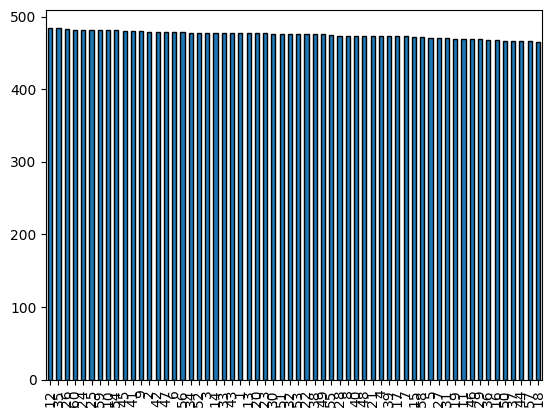

In [26]:
y_train_label1.value_counts().plot(kind='bar', edgecolor='black')

### create a model using Random KNN before feature engineering

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useKNN(X_train_label1, y_train_label1, X_test_label1)
Summary = getSummary(y_test_label1, y_pred)

print(classification_report)

[[ 9  1  0 ...  0  0  0]
 [ 0  8  0 ...  0  0  0]
 [ 0  0  6 ...  0  0  0]
 ...
 [ 0  0  0 ... 13  0  2]
 [ 0  0  0 ...  0  6  0]
 [ 1  0  0 ...  0  1  6]]
Accuracy: 0.6653333333333333
F1 Score: 0.6686187196594876
Precision: 0.7034664594828951
Recall: 0.6653333333333333
<function classification_report at 0x7e4ac24b0a60>


### create a model using Random SVC before feature engineering

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useSVM(X_train_label1, y_train_label1, X_test_label1)
Summary = getSummary(y_test_label1, y_pred)

print(classification_report)

[[10  1  0 ...  0  0  0]
 [ 0  6  1 ...  0  0  0]
 [ 0  0 11 ...  0  0  0]
 ...
 [ 0  0  0 ... 18  1  0]
 [ 0  0  0 ...  0  9  0]
 [ 0  0  0 ...  0  0  8]]
Accuracy: 0.8786666666666667
F1 Score: 0.879863038667138
Precision: 0.8873460760372525
Recall: 0.8786666666666667
<function classification_report at 0x7e4ac24b0a60>


### Add KNN predicted data since it has the better accuracy to csv file

In [ ]:
# from sklearn.metrics import classification_report, confusion_matrix

# predicted_values = dict()

# Before_FE_predict_label = useKNN(X_train_label1, y_train_label1, X_test_predict_label1)
# predicted_values['Predicted labels before feature engineering'] = Before_FE_predict_label

### Find best k features and select

    (before selecting features checked if k is enough to achieve a better accuracy and finally come up with k features is enough)

In [30]:
selected_features = getSelectedFeatures(300, X_train_label1, y_train_label1)

# print selected features
print(selected_features)

Index(['feature_7', 'feature_10', 'feature_12', 'feature_14', 'feature_16',
       'feature_22', 'feature_23', 'feature_26', 'feature_27', 'feature_29',
       ...
       'feature_740', 'feature_744', 'feature_746', 'feature_747',
       'feature_749', 'feature_751', 'feature_752', 'feature_754',
       'feature_757', 'feature_768'],
      dtype='object', length=300)


### Check the accuracy of the selected features are enogh or not using random forest

In [31]:
X_train_selected_label1 = X_train_label1[list(selected_features)]
X_test_selected_label1 = X_test_label1[list(selected_features)]
X_test_predict_selected_label1 = X_test_predict_label1[list(selected_features)]

### Check the accuracy of the selected features are enogh or not using KNN

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useKNN(X_train_selected_label1, y_train_label1, X_test_selected_label1)
Summary = getSummary(y_test_label1, y_pred)

print("using KNN after redusing the features to create model: ")
print(classification_report)

[[10  0  0 ...  0  0  0]
 [ 0  8  0 ...  0  0  0]
 [ 0  0  7 ...  0  0  0]
 ...
 [ 0  0  0 ... 13  0  1]
 [ 0  1  0 ...  0  5  0]
 [ 1  0  0 ...  0  1  7]]
Accuracy: 0.6746666666666666
F1 Score: 0.6749923159439611
Precision: 0.7083868335998368
Recall: 0.6746666666666666
using KNN after redusing the features to create model: 
<function classification_report at 0x7e4ac24b0a60>


### Check the accuracy of the selected features are enogh or not using SVC

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useSVM(X_train_selected_label1, y_train_label1, X_test_selected_label1)
Summary = getSummary(y_test_label1, y_pred)

print("using SVM after redusing the features to create model: ")
print(classification_report)

[[11  1  0 ...  0  0  0]
 [ 0  6  1 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  0  0 ... 17  1  1]
 [ 0  0  0 ...  0  8  0]
 [ 1  0  0 ...  0  0  8]]
Accuracy: 0.832
F1 Score: 0.8335698610036552
Precision: 0.8479725188067293
Recall: 0.832
using SVM after redusing the features to create model: 
<function classification_report at 0x7e4ac24b0a60>


### Create a PCA to create new features using train data

In [35]:
pca, X_train_pca, X_test_pca, X_test_predict_pca = apply_pca(0.99, X_train_label1, X_test_label1, X_test_predict_label1)
print(X_test_pca.keys())
# print(loadings.to_string())

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       ...
       'PC273', 'PC274', 'PC275', 'PC276', 'PC277', 'PC278', 'PC279', 'PC280',
       'PC281', 'PC282'],
      dtype='object', length=282)


### Find the status of the model using KNN after joining PCAs

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = useKNN(X_train_pca, y_train_label1, X_test_pca, 5)
Summary = getSummary(y_test_label1, y_pred)

print("Mean absolute error after adding new pca features of the model Lable_1: ")
print("Classification report: \n", classification_report)

[[ 9  1  0 ...  0  0  0]
 [ 0  8  0 ...  0  0  0]
 [ 0  0  6 ...  0  0  0]
 ...
 [ 0  0  0 ... 13  0  2]
 [ 0  0  0 ...  0  6  0]
 [ 1  0  0 ...  0  1  6]]
Accuracy: 0.6666666666666666
F1 Score: 0.6699455371909286
Precision: 0.705207052952133
Recall: 0.6666666666666666
Mean absolute error after adding new pca features of the model Lable_1: 
Classification report: 
 <function classification_report at 0x7e4ac24b0a60>


### Find the status of the model using SVC after joining PCAs

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useSVM(X_train_pca, y_train_label1, X_test_pca)
Summary = getSummary(y_test_label1, y_pred)

### Highper parameter Tuning

*  Hyper parameter Tuning for SVM modle

In [37]:
from sklearn.model_selection import RandomizedSearchCV
svc_tuning = SVC(class_weight="balanced")
param_dist = {
    'C': [0.1, 10, 15],
    'gamma': [0.001, 0.05, 0.1, 0.5, 1],
    'kernel': ['linear'],
    'degree': [1, 2]
}
random_search = RandomizedSearchCV(
    svc_tuning,
    param_distributions = param_dist, cv=5, n_iter =2, n_jobs =-1)
random_search.fit(X_train_pca, y_train_label1)

RandomizedSearchCV(cv=5, estimator=SVC(class_weight='balanced'), n_iter=2,
                   n_jobs=-1,
                   param_distributions={'C': [0.1, 10, 15], 'degree': [1, 2],
                                        'gamma': [0.001, 0.05, 0.1, 0.5, 1],
                                        'kernel': ['linear']})

In [38]:
predict2 = random_search.predict(X_test_pca)
accuracy_score(y_test_label1, predict2)

0.864

In [39]:
print(random_search.best_estimator_.get_params())

{'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 2, 'gamma': 1, 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [40]:
from sklearn.model_selection import RandomizedSearchCV as rscv
svc_tuninh2 = SVC(class_weight="balanced")
param_dist1 = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'linear']
}
random_search2 = rscv(
    svc_tuninh2,
    param_distributions=param_dist1,
    n_iter=2, cv=5, n_jobs=-1, verbose=1,
    )
random_search2.fit(X_train_pca, y_train_label1)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5, estimator=SVC(class_weight='balanced'), n_iter=2,
                   n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf', 'linear']},
                   verbose=1)

In [41]:
predict2 = random_search2.predict(X_test_pca)
accuracy_score(y_test_label1, predict2)

0.864

In [42]:
print(random_search2.best_estimator_.get_params())

{'C': 0.1, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.1, 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


*  Hyper parameter Tuning for KNN modl


In [43]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = RandomizedSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [44]:
# fit the model on our train set
g_res = gs.fit(X_train_pca, y_train_label1)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [45]:
# get the hyperparameters with the best score
g_res.best_params_
# find the best score
g_res.best_score_

0.7567670377096283

In [46]:
knn = KNeighborsClassifier(algorithm= 'auto', leaf_size= 30, metric= 'manhattan', metric_params= None, n_jobs= None, n_neighbors= 5, p= 2, weights= 'distance')
knn.fit(X_train_pca, y_train_label1)
y_pred = knn.predict(X_test_pca)
Summary = getSummary(y_test_label1, y_pred)

[[10  0  0 ...  0  0  0]
 [ 0  7  0 ...  0  0  0]
 [ 0  0 11 ...  0  0  0]
 ...
 [ 0  0  0 ... 18  0  2]
 [ 0  0  0 ...  0  8  0]
 [ 0  0  0 ...  1  1  7]]
Accuracy: 0.788
F1 Score: 0.7907029400563496
Precision: 0.8124430300464357
Recall: 0.788


## Get best prediction

In [52]:
from sklearn.metrics import classification_report, confusion_matrix

final_model = SVC(C= 0.1, break_ties= False, cache_size= 200, class_weight= 'balanced', coef0= 0.0, decision_function_shape= 'ovr', degree= 3, gamma= 0.1, kernel= 'linear', max_iter= -1, probability= False, random_state= None, shrinking= True, tol= 0.001, verbose= False)

final_model.fit(X_train_pca, y_train_label1)
y_pred = final_model.predict(X_test_pca)
Summary = getSummary(y_test_label1, y_pred)


y_pred_test = final_model.predict(X_test_predict_pca)


[[10  1  0 ...  0  0  0]
 [ 1  5  1 ...  0  0  0]
 [ 0  0 11 ...  0  0  0]
 ...
 [ 0  0  0 ... 19  0  0]
 [ 0  0  0 ...  0  8  0]
 [ 1  0  0 ...  0  0  7]]
Accuracy: 0.864
F1 Score: 0.8650096878562678
Precision: 0.8750436332673174
Recall: 0.864


In [53]:

# Create DataFrame
df = pd.DataFrame(y_pred_test, columns =["label_1"] )
df.head()
df.to_csv("drive/MyDrive/ML_Project/Project_Layer_12_Label_1_new", index=False)